<div style="display: flex, justify-content: center"> 
<h1 style="text-align: center; padding: 25px ;border: solid; background-color: blue; font-size: 30px  "> Projet ML Classification </h1> 
</div>

<div style='text-align: center;padding: 15px; color:blue; font-size:18px'><b>Et si l'Intelligence artificielle rendait la banque plus juste ? </b> </div>
<i style='color:blue;'> Il s'agit de développer une solution d'aide à la décision basée sur le Machine Learning  permettant à un conseiller financier de décider si un client a le droit ou non à l'ouverture d'un compte bancaire. Une telle solution doit prendre en compte l'aspect confidentiel des données client. </i>

<U style=''> Contexte du projet </U> 
<p> 
Dans le monde entier, des milliers de gents de la classe moyenne se retrouvent dans une sorte de dilemme de poule ou œuf. Même s’ils ont un revenu stable, ils n’ont toujours pas accès à un crédit bancaire parce qu'ils n’ont pas d’historique et sans crédit pas d’historique. Elaborer une solution, destinée au secteur bancaire, basée sur l’IA et permettant de déterminer si une personne est légitime ou pas pour obtenir un crédit permet à la fois une inclusion financière de cette classe populaire et une rentabilité pour les banques. La prise de décision plus intelligente et précise pourrait bien changer le modèle économique des banques du futur qui sont toujours confrontées à un risque élevé d’erreur humaine dans leurs activités et qui sont de plus en plus attendues en matière d’engagement sociétal et équitable. </p> 

<U style=''> Modalités pédagogiques </U> 
<p>Ce projet doit être réalisé en équipe (3 personnes par équipe), 5 jours pour réaliser le projet avec 20 min de présentation et 10 min de questions réponses à la fin du projet. Les tâches attribuées pour chaque apprenant du même groupe peuvent évoluer tout au long du projet. Les groupes peuvent également être amenés à changer. </p>

<U style=''> Critères de performance </U>
<p> la solution finale doit être sous forme d'outil d'aide à al décision destiné à un conseiller bancaire :
<ul>
    <li> facile à utiliser </li>
    <li> ergonomique </li>
    <li> performant </li>
    <li> respecte les données confidentielles </li>
</ul>
</p>

<U style=''> Livrables </U>
<p>Votre dossier sur le drive doit comprendre : votre code python, un document qui présente votre démarche (CRISP : méthode de projet ML) ,vos résultats, les difficultés et les perspectives de votre projet (doc word ou powerpoint) </p>

<U> Références utiles </U> 
<p>
<a href="https://www.latribune.fr/entreprises-finance/banques-finance/cyberattaques-comment-les-banques-dejouent-les-nouvelles-menaces-4-5-837999.html"> cybersécurité dans les banques  </a> <br>
<a href="https://www.latribune.fr/opinions/tribunes/l-inclusion-financie-re-a-l-e-re-digitale-un-de-fi-a-relever-835026.html"> inclusion financière  </a> <br>
<a href="https://www.latribune.fr/opinions/tribunes/l-inclusion-financie-re-a-l-e-re-digitale-un-de-fi-a-relever-835026.html"> IA et inclusion financière  </a> <br>
<a href="https://towardsdatascience.com/the-rise-of-the-term-mlops-3b14d5bd1bdb"> Méthodes agiles  </a> <br>
<a href="https://scikit-learn.org/stable/"> Machine learning avec scikit -learn  </a>
</p>

In [48]:
# Toutes les imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as mno

from sklearn.preprocessing import OneHotEncoder

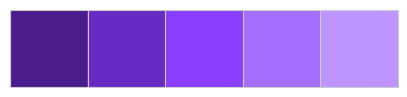

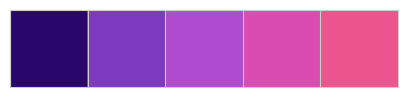

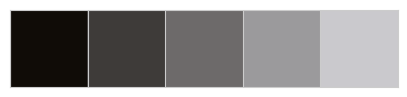

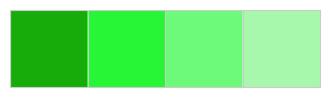

In [50]:
# Liste de palettes de couleurs 
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
color_mix = ['#29066B', '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
green_grad = ['#17AC0A', '#27F637','#6DFA78', '#A7F8AD']

# Plot Color Palletes 
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)
sns.palplot(green_grad)

<div style="display: flex, justify-content: center"> 
<h2 style="text-align: center; padding: 25px ;border: inset; border-color: blue;"> Comprendre les données et la problèmatique liée au métier  </h2> 
</div>

In [51]:
# Dataset 
data = pd.read_csv("./data/data.csv")

In [52]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [55]:
print(f"Il y a {data.shape[0]} observations.")
print(f"Il y a {data.shape[1]} colonnes.")

num_attribs = ['year', 'household_size', 'age_of_respondent']
cat_attribs = [data.columns[i] for i in range(len(data.columns)) if data.columns[i] not in num_attribs]

print(f"\n Il y a  {len(num_attribs)} variables numériques : ")
for i in range(len(num_attribs)):
    print(f"{i+1}. {num_attribs[i]}")

print(f"\n Il y a {len(cat_attribs)} variables catégorielles: ")
for i in range(len(cat_attribs)):
    print(f"{i+1}. {cat_attribs[i]}")


Il y a 23524 observations.
Il y a 13 colonnes.

 Il y a  3 variables numériques : 
1. year
2. household_size
3. age_of_respondent

 Il y a 10 variables catégorielles: 
1. country
2. uniqueid
3. bank_account
4. location_type
5. cellphone_access
6. gender_of_respondent
7. relationship_with_head
8. marital_status
9. education_level
10. job_type


<div style="display: flex, justify-content: center"> 
<h2 style="text-align: center; padding: 25px ;border: inset; border-color: blue;"> Exploratory Data Analysis (EDA) </h2> 
</div>

In [57]:
# Recherche de données manquantes

In [56]:
data.isna().sum(axis=0) 

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<AxesSubplot:>

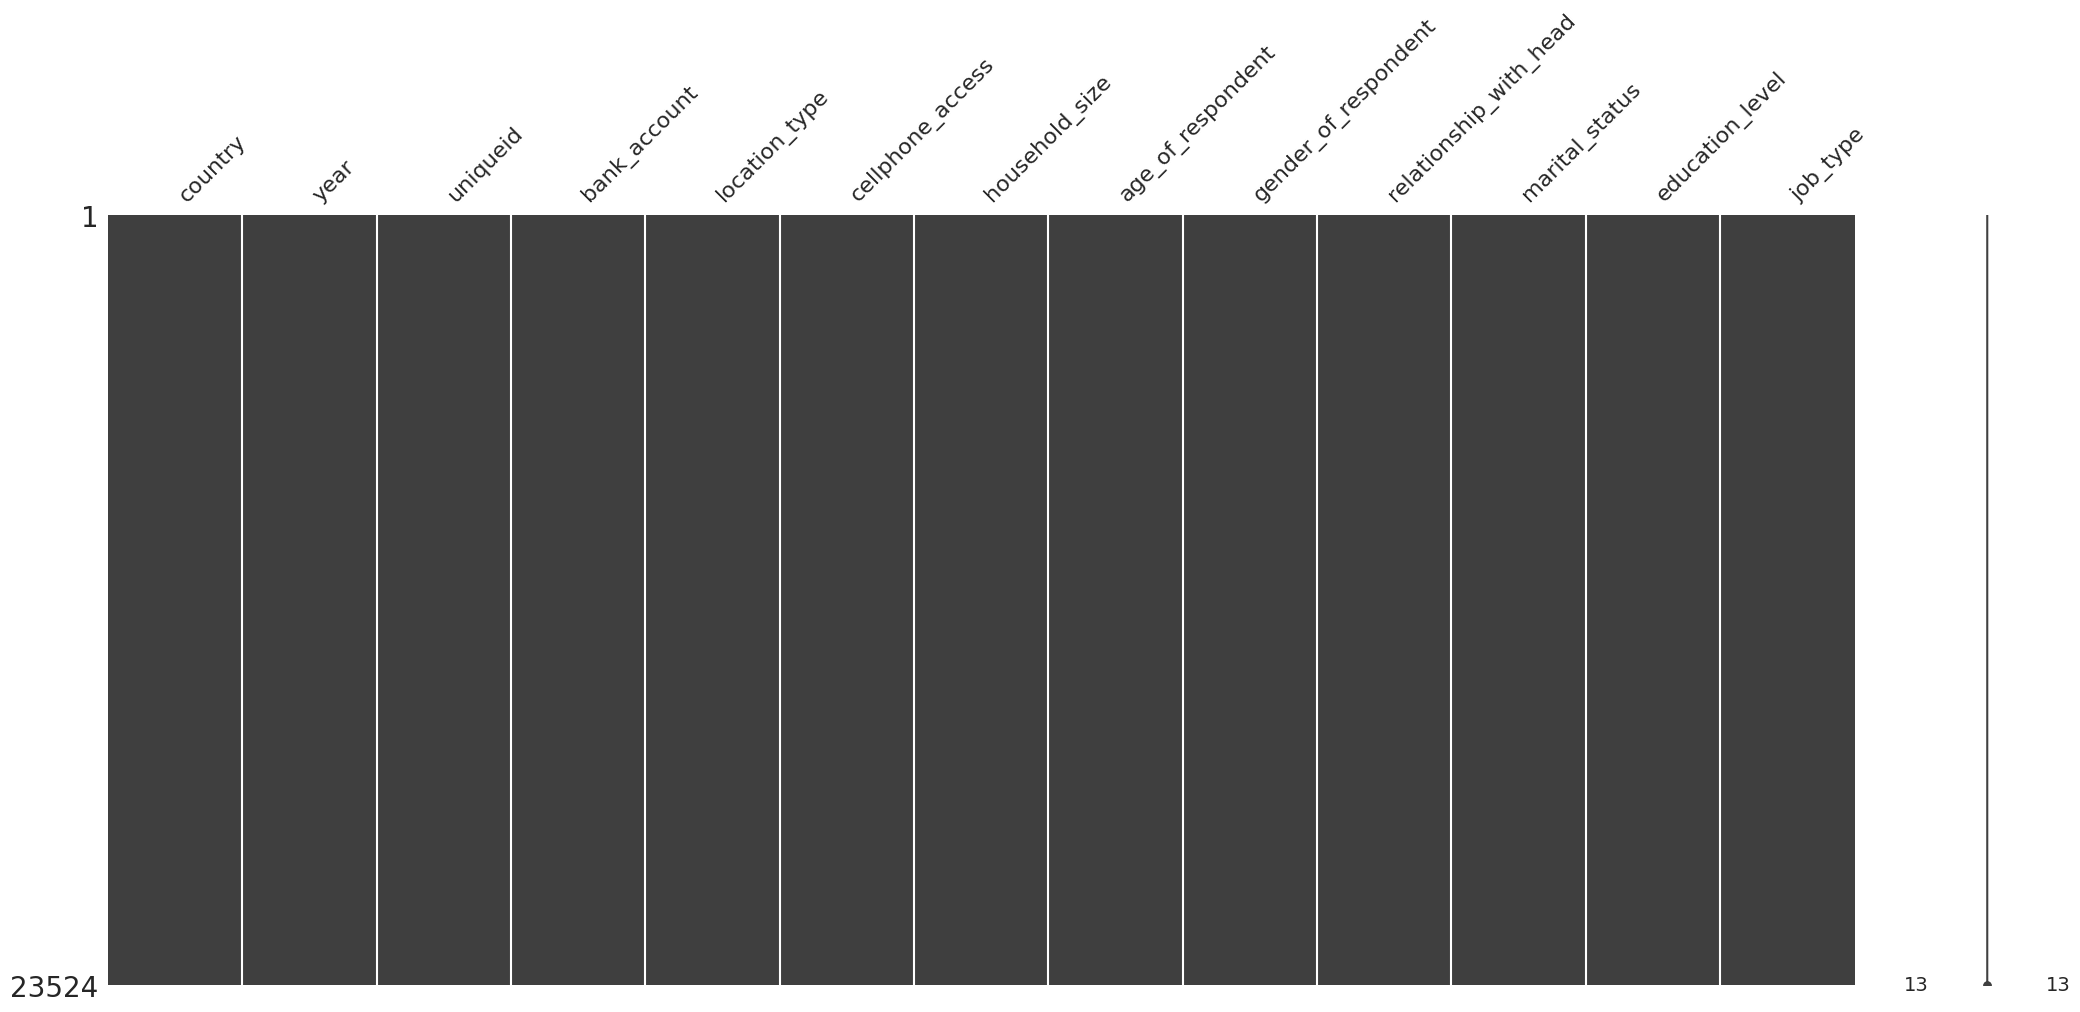

In [58]:
mno.matrix(data)

In [59]:
# aucune données manquantes

In [60]:
# Recherche valeur not unique

In [61]:
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64


In [62]:
# Recherche outliers 

In [63]:
def boxP(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

Text(0.5, 1.0, 'statuts marital par rapport à la taille du ménage')

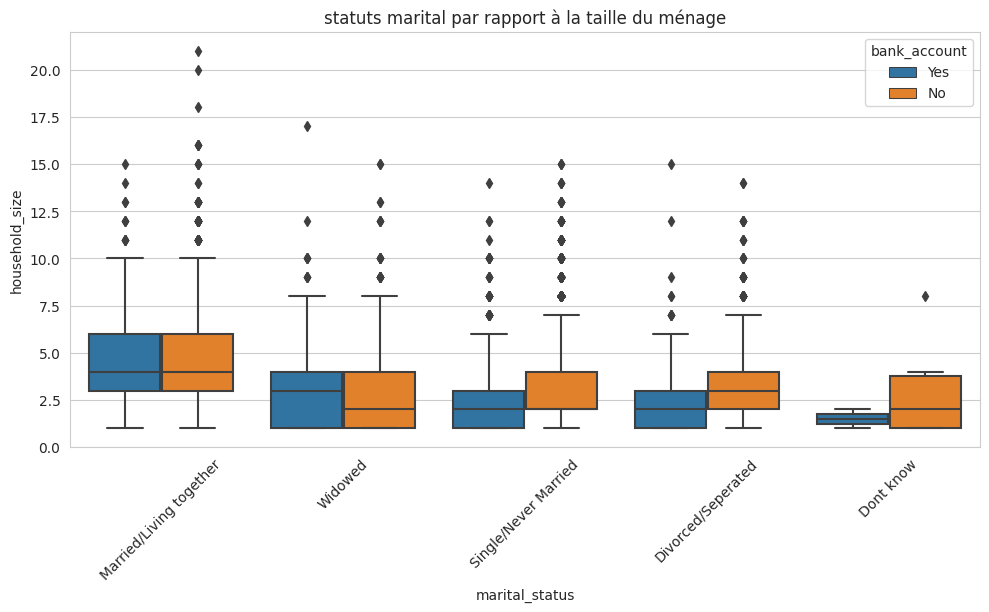

In [17]:
boxP("marital_status","household_size","bank_account")
plt.title('statuts marital par rapport à la taille du ménage')

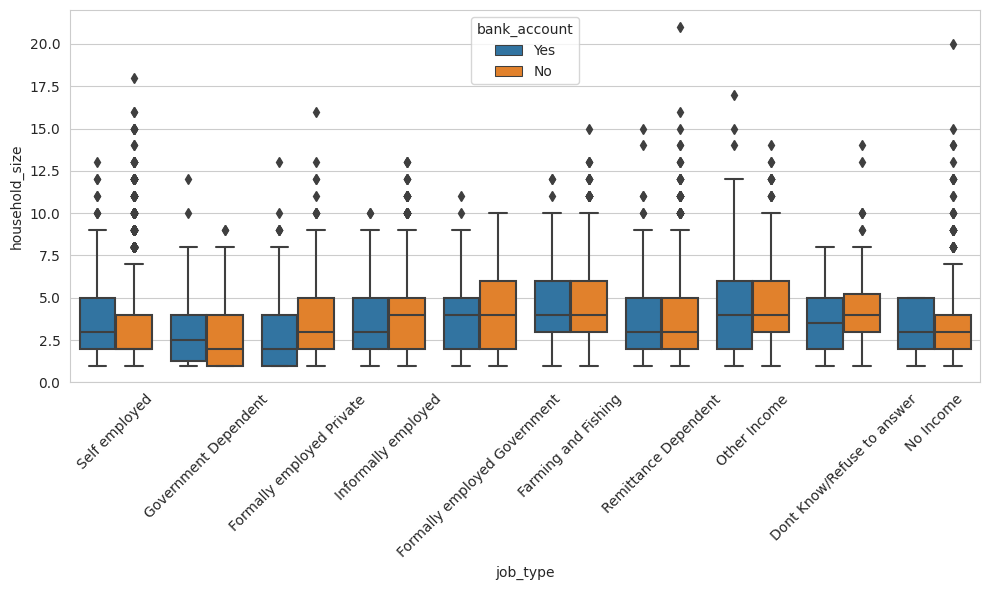

In [18]:
boxP("job_type","household_size","bank_account")

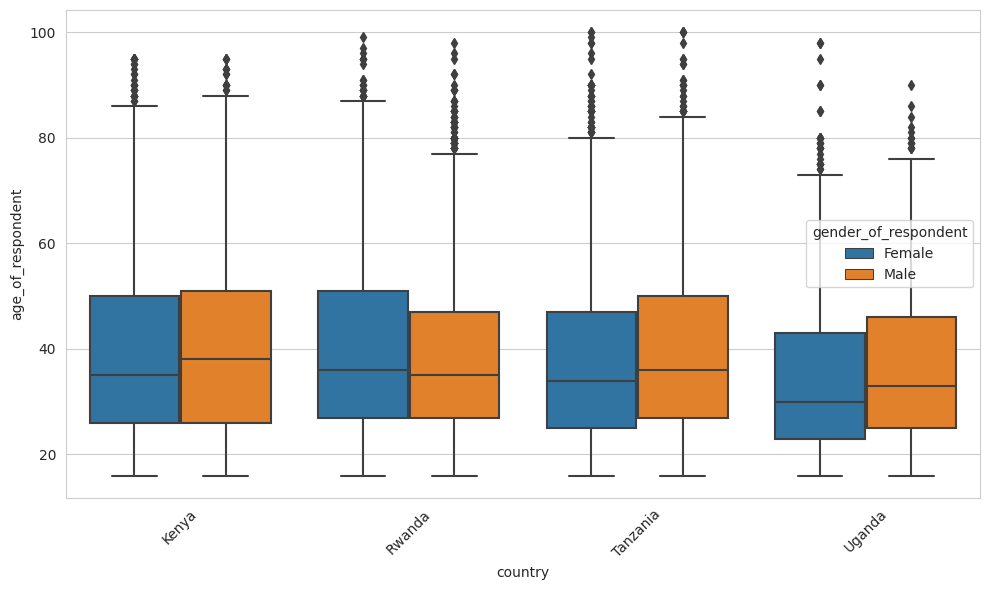

In [19]:
boxP("country","age_of_respondent","gender_of_respondent")

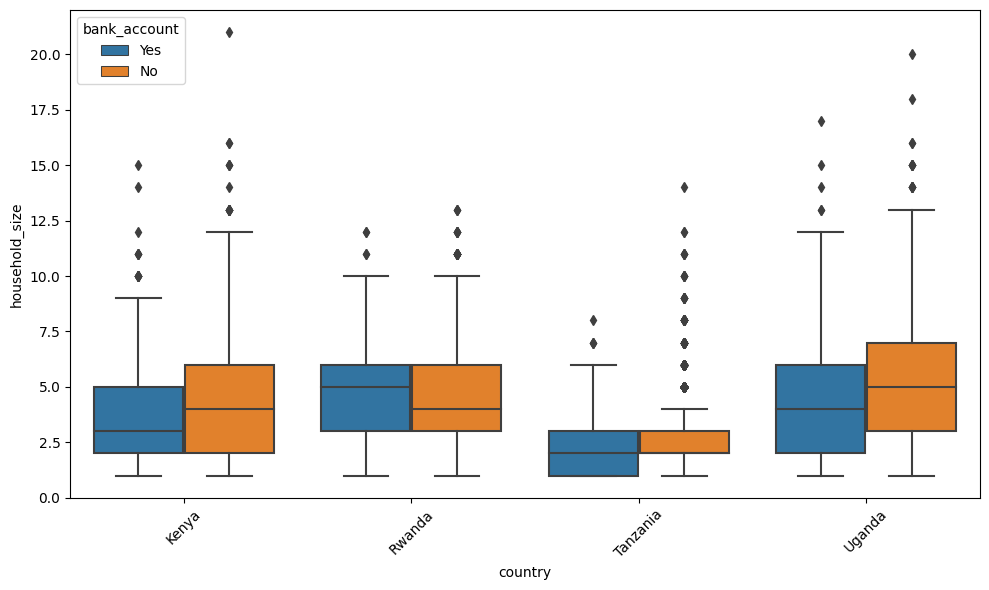

In [76]:
boxP("country","household_size","bank_account")

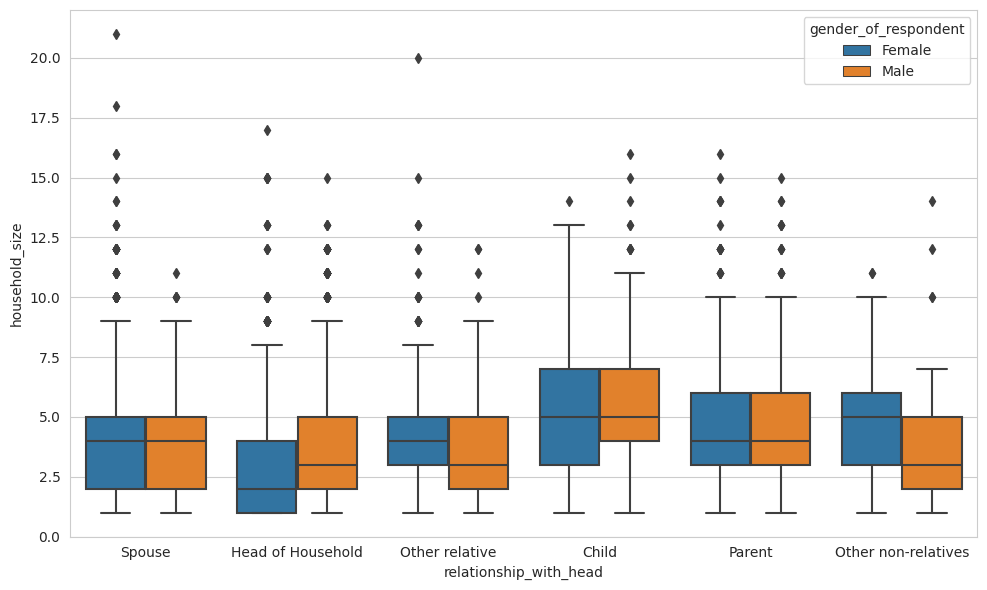

In [20]:
boxP("relationship_with_head","household_size","gender_of_respondent",r=0)

In [21]:
# recherche correlation

<AxesSubplot:>

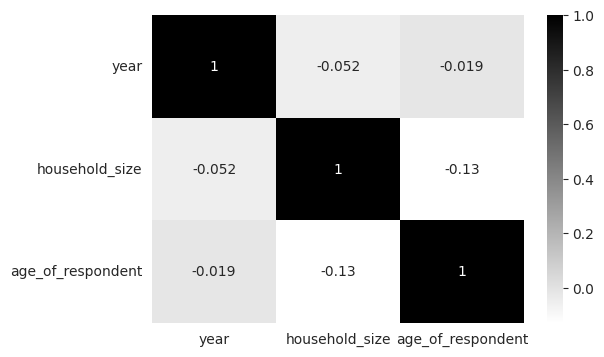

In [64]:
corr = data.corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap=plt.cm.binary)

## Encodage 

In [65]:
# Supprime la colonne ID car non pertinente on a deja la colonne pays 
data_1 = data.drop('uniqueid',  axis = 1)

In [24]:
data_1

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [43]:
# Encode avec onehot encoder
enc = OneHotEncoder(sparse=False).fit(data_1[['country','year','bank_account','location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']])
encoder = enc.transform(data_1[['country','year','bank_account','location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']])
encoded_df = pd.DataFrame(encoder, columns=enc.get_feature_names_out())
bank_df = pd.concat([data_1,encoded_df],axis=1)
final_bank_df = bank_df.drop(["country","location_type","cellphone_access","gender_of_respondent","relationship_with_head","marital_status","education_level","job_type"],axis=1)

In [44]:
#Je crée un pickle
final_bank_df.to_pickle("./data/data_bank.pkl") 